In [67]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
house= pd.read_csv("C:/Users/hp/Documents/house price prediction.csv")

In [71]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
null_values = house.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [75]:
house.drop('Id',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [77]:
house.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1654591334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)


In [79]:
house=house.drop('Alley', axis=1)

In [81]:
house=house.drop('PoolQC', axis=1)

In [83]:
house= house.drop('FireplaceQu', axis=1)

In [85]:
house=house.drop('Fence',axis=1)

In [87]:
house= house.drop('MasVnrType', axis=1)

In [89]:
house= house.drop('MiscFeature', axis=1)

In [91]:
house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1444761451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace =True)


In [93]:
house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\4277657178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace =True)


In [95]:
house.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3735120799.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [97]:
house['BsmtQual'].fillna(house['BsmtQual'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1031669755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtQual'].fillna(house['BsmtQual'].mode()[0], inplace =True)


In [99]:
house.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\922975477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace=True)


In [101]:
house['BsmtCond'].fillna(house['BsmtCond'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\4004635537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtCond'].fillna(house['BsmtCond'].mode()[0], inplace =True)


In [103]:
house.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3590052576.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace=True)


In [105]:
house['BsmtExposure'].fillna(house['BsmtExposure'].mean(), inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2609476973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtExposure'].fillna(house['BsmtExposure'].mean(), inplace =True)


In [107]:
house.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\879367720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace=True)


In [109]:
house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2115056094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode()[0], inplace =True)


In [111]:
house.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2166656921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace=True)


In [113]:
house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2962837253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode()[0], inplace =True)


In [115]:
house.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2136037574.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace=True)


In [117]:
house['Electrical'].fillna(house['Electrical'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\320720008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Electrical'].fillna(house['Electrical'].mode()[0], inplace =True)


In [119]:
house.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\43260639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)


In [210]:
house.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\122092003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace=True)


In [124]:
house['GarageType'].fillna(house['GarageType'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2093380442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageType'].fillna(house['GarageType'].mode()[0], inplace =True)


In [126]:
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3233786639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode()[0], inplace =True)


In [128]:
house.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\849629115.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace=True)


In [130]:
house['GarageFinish'].fillna(house['GarageFinish'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\4201900666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageFinish'].fillna(house['GarageFinish'].mode()[0], inplace =True)


In [132]:
house.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1660056523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace=True)


In [134]:
house['GarageQual'].fillna(house['GarageQual'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1954792353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageQual'].fillna(house['GarageQual'].mode()[0], inplace =True)


In [136]:
house.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3730539906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace=True)


In [138]:
house['GarageCond'].fillna(house['GarageCond'].mode()[0], inplace =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1446135405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageCond'].fillna(house['GarageCond'].mode()[0], inplace =True)


In [140]:
house.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1751435784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace=True)


In [142]:
house.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\279046681.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace=True)


In [144]:
house.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3, 'Ex':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1387338335.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3, 'Ex':4}}, inplace=True)


In [146]:
house.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\911642141.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace=True)


In [148]:
house.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3346897183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace=True)


In [150]:
house.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1213846611.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)


In [214]:
house.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2483277991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)


In [156]:
house.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2473818248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace=True)


In [206]:
house = house.drop('Neighborhood', axis=1)

In [160]:
house=house.drop('Condition1', axis=1)

In [164]:
house= house.drop('Condition2', axis = 1)

In [168]:
house.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2558111672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)


In [170]:
house=house.drop('RoofMatl', axis=1)

In [172]:
house= house.drop('Exterior1st', axis=1)

In [174]:
house= house.drop('Exterior2nd', axis=1)

In [178]:
house.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\233978891.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [180]:
house.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\209435185.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}}, inplace=True)


In [182]:
house.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2833459945.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}}, inplace=True)


In [184]:
house.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\214173522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)


In [186]:
house.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\1817338394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)


In [188]:
house.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2107606055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [190]:
house.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\744162659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)


In [192]:
house.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\3169847868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)


In [194]:
house.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\2002082478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)


In [196]:
house.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21336\604751564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)


In [216]:
correlation=house.corr()

In [218]:
correlation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.021713,-0.009601,-0.033226,-0.008916,-0.024071,0.008332,1.332409e-02,-0.014160,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017218,-0.016834,-0.021917
MSSubClass,0.011156,1.000000,0.280306,-0.357056,-0.139781,0.024969,-0.115361,-0.025090,-2.284384e-02,-0.037573,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.016085,0.004788,-0.084284
MSZoning,-0.021713,0.280306,1.000000,-0.240746,-0.164093,0.115502,-0.188404,0.008574,-1.170109e-02,-0.082953,...,0.124006,-0.046646,-0.063773,-0.030701,-0.017745,0.030967,-0.002833,0.073850,0.099049,-0.183642
LotFrontage,-0.009601,-0.357056,-0.240746,1.000000,0.306795,0.037323,0.197078,0.085590,-5.447825e-18,0.050847,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.009545,0.017143,0.334901
LotArea,-0.033226,-0.139781,-0.164093,0.306795,1.000000,0.197131,0.315484,0.339008,1.012318e-02,0.131099,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,-0.013285,-0.016193,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.030967,0.010158,0.001205,-0.003690,0.026617,0.053402,-5.155166e-02,-0.024821,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.042867,0.033540,0.046432
YrSold,0.000712,-0.021407,-0.002833,0.006768,-0.014261,0.025043,-0.037391,-0.025586,2.335254e-02,0.011358,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.020916,-0.095609,-0.028923
SaleType,-0.017218,0.016085,0.073850,0.009545,-0.013285,0.021569,-0.000301,-0.020351,5.827812e-02,0.011157,...,-0.013426,-0.002435,-0.029667,-0.009903,-0.014184,0.042867,-0.020916,1.000000,0.232602,0.081115
SaleCondition,-0.016834,0.004788,0.099049,0.017143,-0.016193,0.029729,-0.030278,0.027309,5.761893e-02,-0.007482,...,0.006516,-0.003393,-0.014412,0.095828,-0.031561,0.033540,-0.095609,0.232602,1.000000,0.004591


<Axes: >

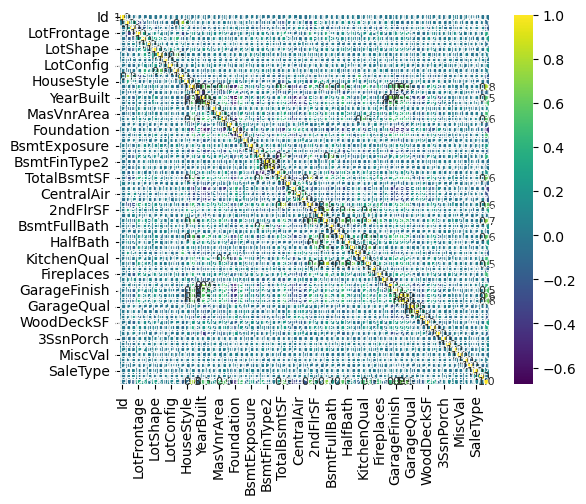

In [220]:
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='viridis')

In [222]:
house.to_csv('cleaned_dataset.csv', index =False)

In [224]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,3,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,1,0,0,1,...,272,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,1,0,0,3,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125


In [228]:
x= house.drop('SalePrice', axis=1)

In [230]:
y = house['SalePrice']

In [232]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [242]:
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape, y.shape

((1460, 68), (1168, 68), (292, 68), (1168,), (292,), (1460,))

In [244]:
model= RandomForestRegressor()

In [250]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [251]:
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict, y_train)
print('accuracy of training data:', training_data_accuracy)

accuracy of training data: 0.9756885179377454


In [254]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict, y_test)
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.8561728439493461


In [258]:
absolute_error_train = metrics.mean_absolute_error(training_data_predict, y_train)
print('absolute error of train data', absolute_error_train)

absolute error of train data 6571.045162671233


In [260]:
absolute_error_test = metrics.mean_absolute_error(testing_data_predict, y_test)
print('absolute error of test data', absolute_error_test)

absolute error of test data 18694.61582191781


In [264]:
input_data=(1,60,	0,	65.0,	8450,	0	,0,	0,	0,	0,	0,	0,	1,	7,	5,	2003,	2003,	0,	196.0,	1,	0,	0,	1.0,	0.0,	0.0,	1.0,	706,	0.0,	0,	150,	856,	0	,0,	0,	0.0,	856,	854,	0,	1710,	1,	0,	2,	1,	3,	1,	1,	8,	0,	0,	0,	2003.0,	1.0,	2,	548,	0.0,	0.0,	0,	0,	61,	0,	0,	0,	0,	0,	2,	2008,	0,	0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print('predicted price of house', prediction[0])


predicted price of house 209129.51


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
